### import libraries

In [1]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
plt.style.use('bmh')
%matplotlib inline

In [2]:
# import the data for prediction 
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# let's explore sex, it is a categorical variable 
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

visualizing

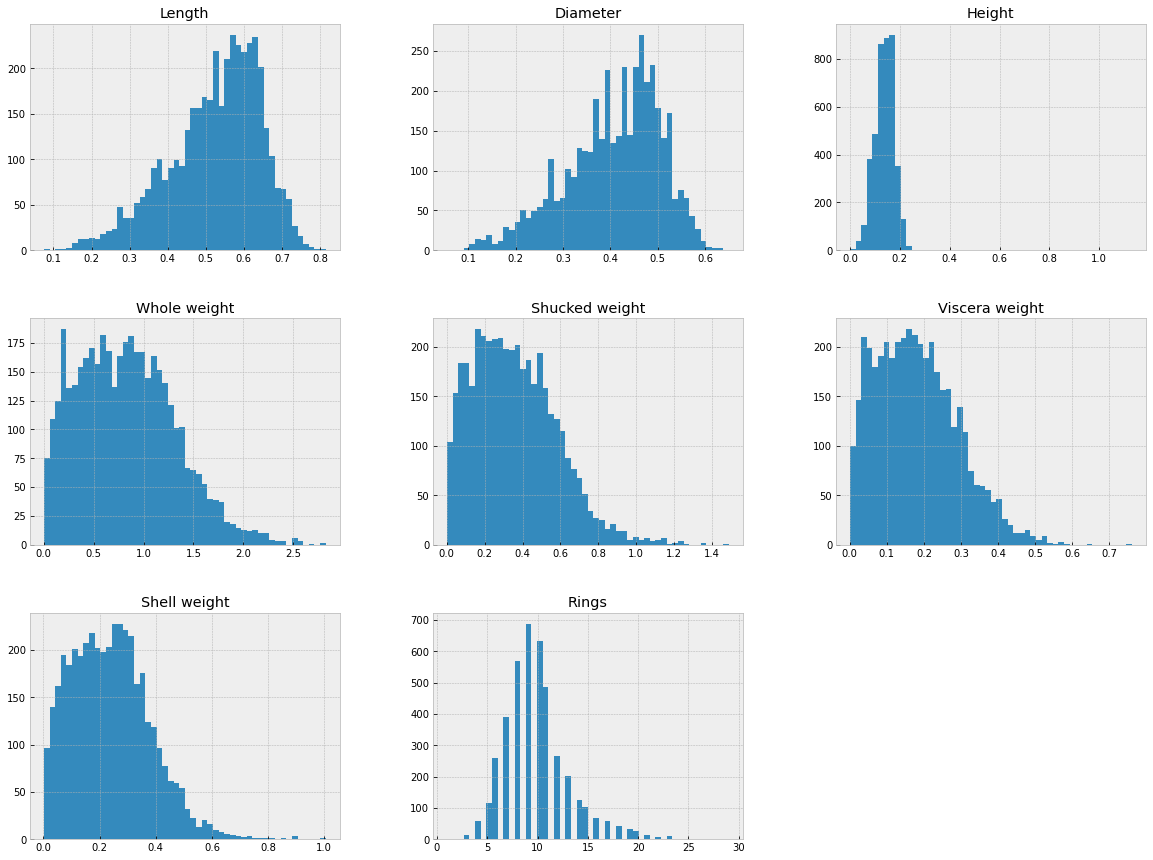

In [5]:
# visualizing the features
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
# Find the r value aka standard correlation coefficient 
corr_matrix = df.corr()
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

array([[<AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>],
       [<AxesSubplot:xlabel='Length', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Diameter'>],
       [<AxesSubplot:xlabel='Length', ylabel='Height'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Height'>,
        <AxesSubplot:xlabe

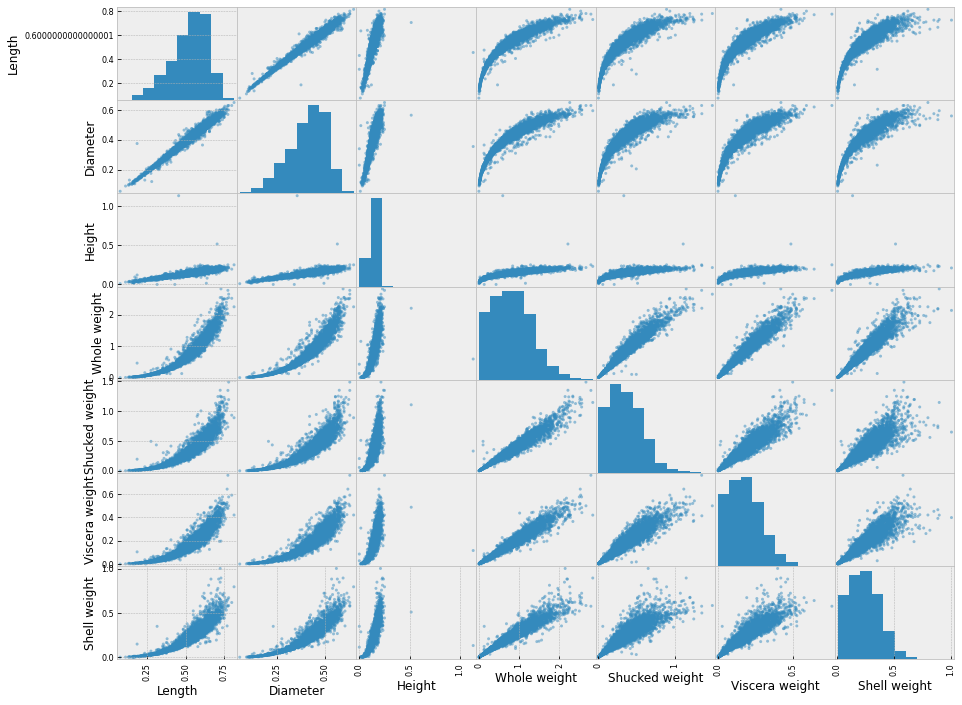

In [7]:
# plot variables against each other to find the relationship 
attributes = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
scatter_matrix(df[attributes], figsize=(15, 12))

In [8]:
# convert text labels to integer labels
sex_label = LabelEncoder()
df['Sex'] = sex_label.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
# define the features and the labels
# dropping the sex column due to the lack of correlation 

X = df.drop(['Rings', 'Sex'], axis=1)
y = df['Rings']
# divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

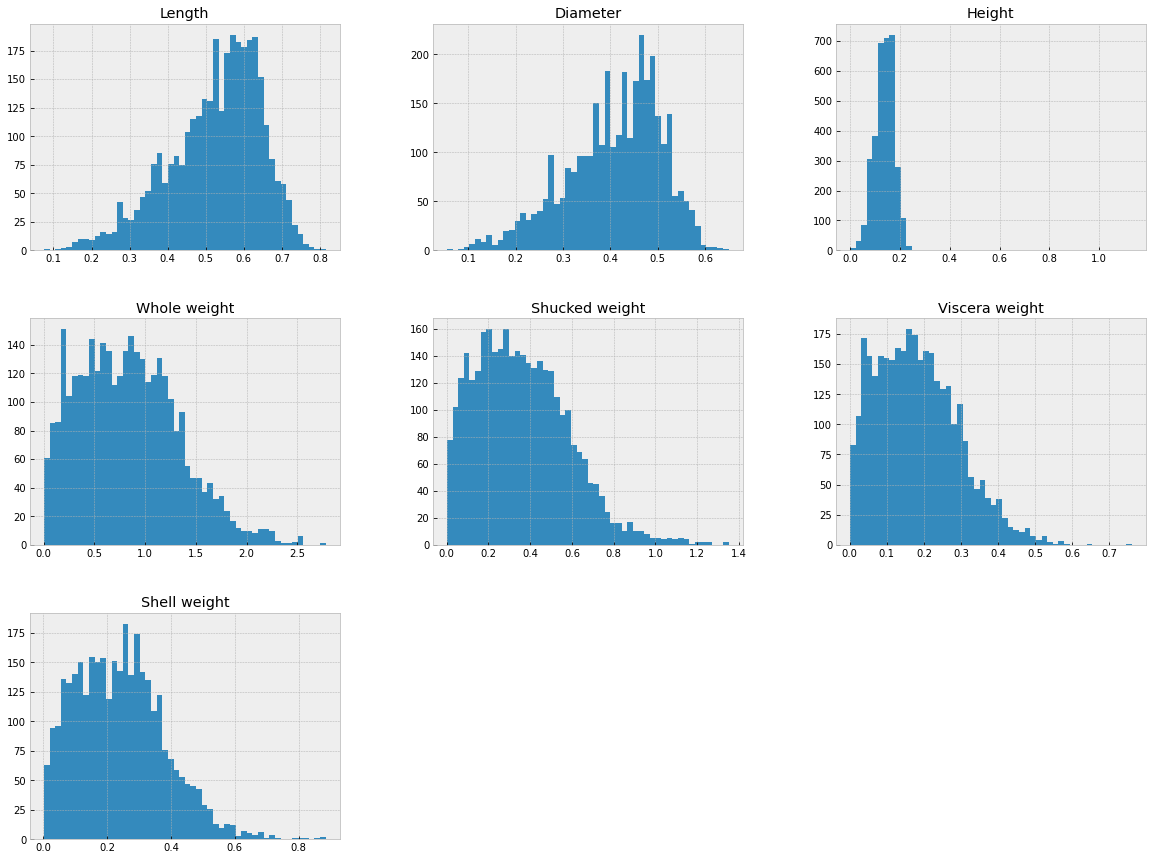

In [11]:
X_train.hist(bins=50, figsize=(20, 15))
plt.show()

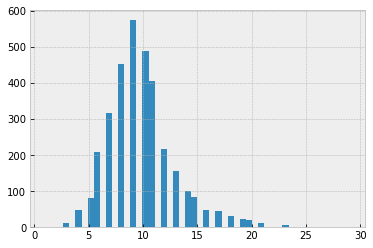

In [12]:
y_train.hist(bins=50)
plt.show()

In [13]:
# standardize our data 
# standardization is less affected by outliers
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [15]:
# fine tune hyperparamaters
knn_grid = [
    {'n_neighbors': [i+1 for i in range(10)] }, 
]
knn = KNeighborsRegressor()
knn_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5,
                          return_train_score=True, n_jobs=-1)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [16]:
knn_search.best_params_

{'n_neighbors': 10}

In [17]:
result = knn_search.cv_results_
for mean_acc, params in zip(result['mean_test_score'], result['params']):
    print(mean_acc, params)

-8.513166492127851 {'n_neighbors': 1}
-6.3615190023540364 {'n_neighbors': 2}
-5.719789867201323 {'n_neighbors': 3}
-5.36643313708905 {'n_neighbors': 4}
-5.18830444939717 {'n_neighbors': 5}
-5.02133466002723 {'n_neighbors': 6}
-4.956162918968507 {'n_neighbors': 7}
-4.873355349279021 {'n_neighbors': 8}
-4.8139989522145985 {'n_neighbors': 9}
-4.751570894086267 {'n_neighbors': 10}


In [18]:
# try other models
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma}

In [19]:
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=20, verbose=1)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.5s finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [20]:
svm_search.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

In [21]:
result = svm_search.cv_results_
for mse, params in zip(result['mean_test_score'], result['params']):
    print(mse, params)

-7.998661833401376 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}
-7.516352482650632 {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.01}
-5.225220127311025 {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}
-4.368779004545864 {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
-4.743641868114589 {'kernel': 'rbf', 'gamma': 1, 'C': 1}
-5.049542907896364 {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
-4.673969962553444 {'kernel': 'rbf', 'gamma': 1, 'C': 10}
-8.319498477278334 {'kernel': 'poly', 'gamma': 0.01, 'C': 10}
-6719.427367659686 {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 1}
-1795.5991247123718 {'kernel': 'poly', 'gamma': 1, 'C': 0.1}
-4.688821669402463 {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
-49333.45368187362 {'kernel': 'sigmoid', 'gamma': 1, 'C': 1}
-5.8224958488007275 {'kernel': 'linear', 'gamma': 0.01, 'C': 0.01}
-5.049542907896364 {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
-4906836.105324281 {'kernel': 'sigmoid', 'gamma': 1, 'C': 10}
-325.35600650711575 {'kernel': 'poly', 'gamma': 0.1, 'C': 1}
-12.5064588881

In [ ]:
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)],
                 'criterion': ['mse', 'mae'],
                 'bootstrap': [True, False]}

ensemble = RandomForestRegressor()
ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
ensemble_search.best_params_

In [ ]:
result = ensemble_search.cv_results_
for mse, params in zip(result['mean_test_score'], result['params']):
    print(mse, params)

In [ ]:
svm_reg = svm_search.best_estimator_
svm_reg.fit(X_train, y_train)

In [ ]:
svm_pred = svm_reg.predict(X_test)
print(np.sqrt(mean_squared_error(svm_pred, y_test)))

In [ ]:
knn_reg = knn_search.best_estimator_
knn_reg.fit(X_train, y_train)

In [ ]:
knn_pred = knn_reg.predict(X_test)
print(np.sqrt(mean_squared_error(knn_pred, y_test)))

In [ ]:
ensemble_reg = ensemble_search.best_estimator_
ensemble_reg.fit(X_train, y_train)

In [ ]:
ensemble_pred = ensemble_reg.predict(X_test)
print(np.sqrt(mean_squared_error(ensemble_pred, y_test)))